In [2]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [61]:
df = pd.read_csv('gaadi.csv')

In [62]:
df

,Unnamed: 0,Car Name,Car Model,Year,Mileage,Fuel Type,Owner,Price
0,0,MARUTI SUZUKI ALTO,LX BS-III,2011.0,60000.0,Petrol,2nd Owner,₹1.75L
1,1,TATA MOTORS ZEST,XMS Diesel,2018.0,65226.0,Diesel,1st Owner,₹3.2L
2,2,TOYOTA FORTUNER,2.5 Sportivo 4x2 MT,2013.0,125438.0,Diesel,1st Owner,₹13.8L
3,3,MAHINDRA TUV 300,T4 Plus,2020.0,65655.0,Diesel,1st Owner,₹6L
4,4,MARUTI SUZUKI ERTIGA,VXI,2022.0,14000.0,Diesel,1st Owner,₹10.8L
...,...,...,...,...,...,...,...,...
10432,10432,TATA MOTORS Nano,Twist XE,2015.0,45000.0,Petrol,1 Owner,₹1.8L
10433,10433,MARUTI SUZUKI ALTO,AX,2010.0,34000.0,CNG,1 Owner,₹1.8L
10434,10434,HYUNDAI Santro Xing [2003-2008],XK (Non-AC) eRLX - Euro III,2007.0,45000.0,Petrol,1 Owner,₹1L
10435,10435,VOLKSWAGEN Vento [2014-2015],Comfortline Diesel,2015.0,33000.0,Diesel,1 Owner,₹10L


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10437 non-null  int64  
 1   Car Name    10437 non-null  object 
 2   Car Model   10437 non-null  object 
 3   Year        9426 non-null   float64
 4   Mileage     9522 non-null   float64
 5   Fuel Type   9522 non-null   object 
 6   Owner       9426 non-null   object 
 7   Price       10437 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 652.4+ KB


In [64]:
df.describe()

,Unnamed: 0,Year,Mileage
count,10437.000000,9426.000000,9522.000000
mean,5218.000000,2015.345958,86977.760765
std,3013.046714,4.123001,113484.577743
min,0.000000,1995.000000,1552.000000
25%,2609.000000,2013.000000,36764.000000
50%,5218.000000,2016.000000,66000.000000
75%,7827.000000,2018.000000,89076.000000
max,10436.000000,2024.000000,987990.000000


In [65]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [66]:
df.head()

,Car Name,Car Model,Year,Mileage,Fuel Type,Owner,Price
0,MARUTI SUZUKI ALTO,LX BS-III,2011.0,60000.0,Petrol,2nd Owner,₹1.75L
1,TATA MOTORS ZEST,XMS Diesel,2018.0,65226.0,Diesel,1st Owner,₹3.2L
2,TOYOTA FORTUNER,2.5 Sportivo 4x2 MT,2013.0,125438.0,Diesel,1st Owner,₹13.8L
3,MAHINDRA TUV 300,T4 Plus,2020.0,65655.0,Diesel,1st Owner,₹6L
4,MARUTI SUZUKI ERTIGA,VXI,2022.0,14000.0,Diesel,1st Owner,₹10.8L


In [67]:
def clean_and_convert(value):
    value = value.replace('₹', '')


    if 'L' in value:
        value = float(value.replace('L', '')) * 100000
    else:
        try:
            value = float(value)
        except ValueError:
            value = value

    return value

df['Price'] = df['Price'].apply(clean_and_convert)

print(df['Price'])


0         175000.0
1         320000.0
2        1380000.0
3         600000.0
4        1080000.0
           ...    
10432     180000.0
10433     180000.0
10434     100000.0
10435    1000000.0
10436     880000.0
Name: Price, Length: 10437, dtype: object


In [68]:
df.dropna(inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9426 entries, 0 to 10436
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Car Name   9426 non-null   object 
 1   Car Model  9426 non-null   object 
 2   Year       9426 non-null   float64
 3   Mileage    9426 non-null   float64
 4   Fuel Type  9426 non-null   object 
 5   Owner      9426 non-null   object 
 6   Price      9426 non-null   object 
dtypes: float64(2), object(5)
memory usage: 589.1+ KB


In [71]:
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9426 entries, 0 to 10436
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Car Name   9426 non-null   object 
 1   Car Model  9426 non-null   object 
 2   Year       9426 non-null   float64
 3   Mileage    9426 non-null   float64
 4   Fuel Type  9426 non-null   object 
 5   Owner      9426 non-null   object 
 6   Price      9426 non-null   float64
dtypes: float64(3), object(4)
memory usage: 589.1+ KB


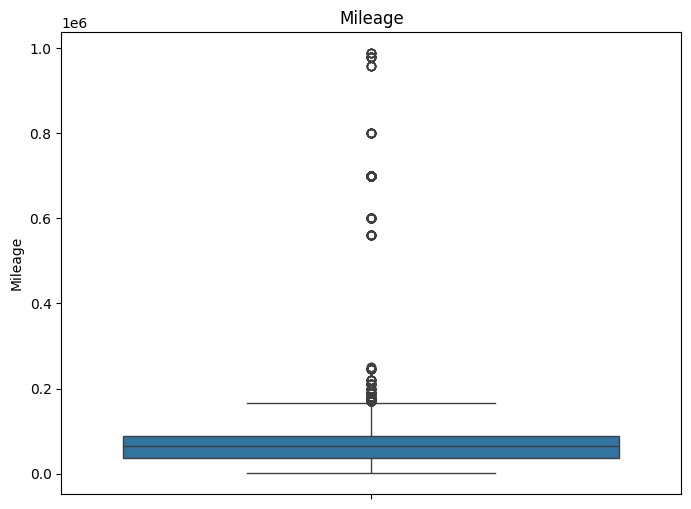

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Mileage'])
plt.title('Mileage')
plt.show()

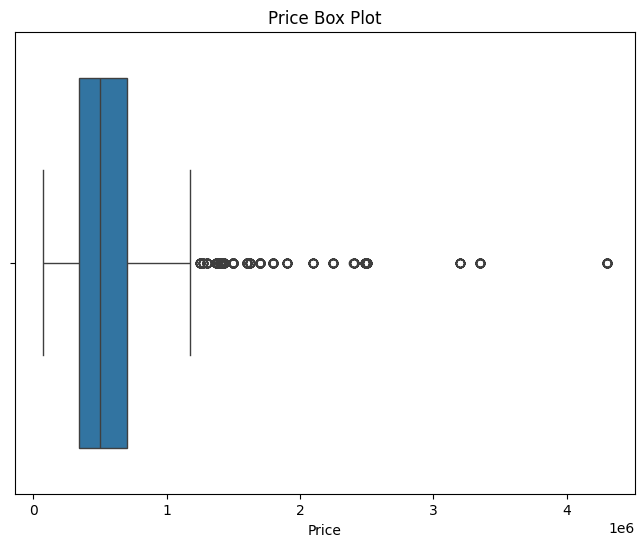

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Price'])
plt.title('Price Box Plot')

plt.show()


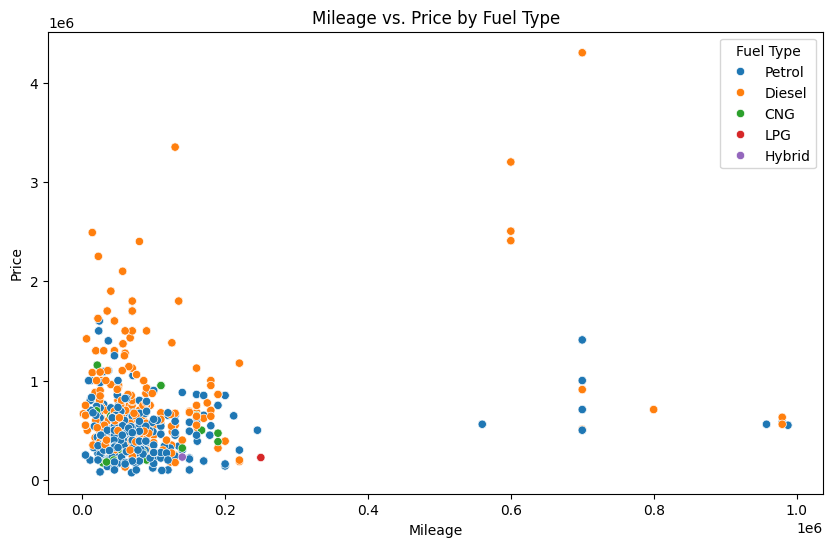

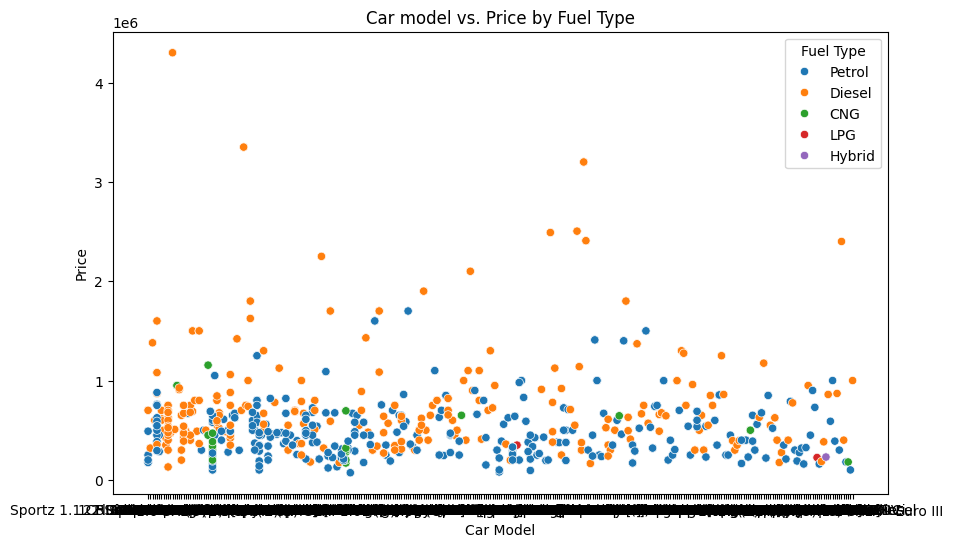

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', hue='Fuel Type', data=df)
plt.title('Mileage vs. Price by Fuel Type')
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Car Model', y='Price', hue='Fuel Type', data=df)
plt.title('Car model vs. Price by Fuel Type')
plt.show()

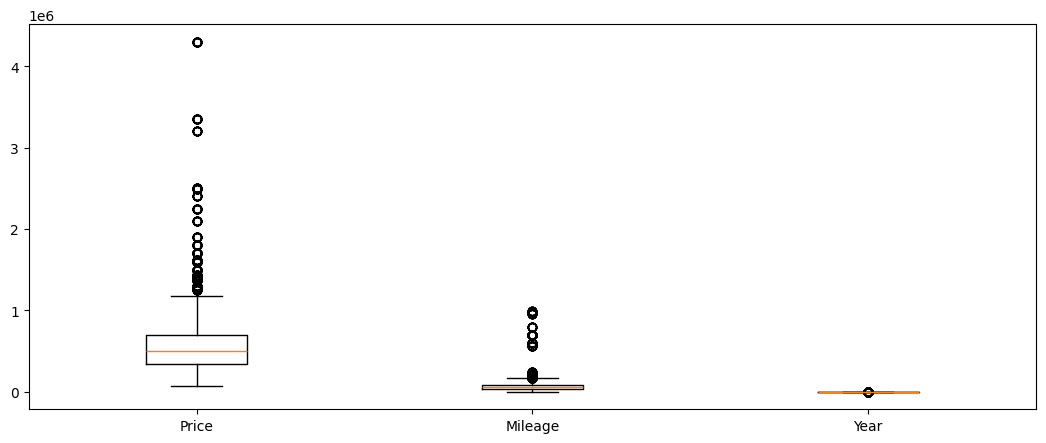

In [76]:
plt.figure(figsize = (13,5))
ax = plt.subplot()
features = ['Price','Mileage','Year']
plt.boxplot(df[features]);
ax.set_xticklabels(features);
plt.show()

In [77]:
df.shape

(9426, 7)

In [78]:
# Define a function to remove outliers from a DataFrame and calculate the percentage of data points that are outliers.
# Parameters:
# - data: The DataFrame containing the data.
# - col: The column in the DataFrame for which outliers are being removed.
# - threshold: The number of interquartile ranges (IQR) to use in identifying outliers. Default is 1.5.

def remove_outliers_and_percentage(df_cleaned, col, threshold=1.5):
    # Calculate the first quartile (Q1) and third quartile (Q3) of the specified column.
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)

    # Calculate the interquartile range (IQR) from Q1 and Q3.
    IQR = Q3 - Q1

    # Define the lower and upper bounds for identifying outliers.
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Create a new DataFrame 'data_no_outliers' by filtering out rows with values outside the bounds.
    data_no_outliers = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    # Calculate the percentage of data points that are outliers.
    percentage_outliers = ((len(df_cleaned) - len(data_no_outliers)) / len(df_cleaned)) * 100

    # Return the DataFrame without outliers and the percentage of outliers.
    return data_no_outliers, percentage_outliers

In [79]:
cleaned_data, outlier_percentage = remove_outliers_and_percentage(df,'Price')

# Retrieve and display the percentage of data points that were outliers in the 'chol' column.
outlier_percentage

7.4899214937407175

In [80]:
def remove_outliers(df, threshold=3):
  df_cleaned = df.copy()

  for col in df_cleaned.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    df_cleaned = df_cleaned[
        (df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)
    ]

  return df_cleaned

In [81]:
df_cleaned = remove_outliers(df)

In [82]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9044 entries, 0 to 10436
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Car Name   9044 non-null   object 
 1   Car Model  9044 non-null   object 
 2   Year       9044 non-null   float64
 3   Mileage    9044 non-null   float64
 4   Fuel Type  9044 non-null   object 
 5   Owner      9044 non-null   object 
 6   Price      9044 non-null   float64
dtypes: float64(3), object(4)
memory usage: 565.2+ KB


In [83]:
df_cleaned

,Car Name,Car Model,Year,Mileage,Fuel Type,Owner,Price
0,MARUTI SUZUKI ALTO,LX BS-III,2011.0,60000.0,Petrol,2nd Owner,175000.0
1,TATA MOTORS ZEST,XMS Diesel,2018.0,65226.0,Diesel,1st Owner,320000.0
2,TOYOTA FORTUNER,2.5 Sportivo 4x2 MT,2013.0,125438.0,Diesel,1st Owner,1380000.0
3,MAHINDRA TUV 300,T4 Plus,2020.0,65655.0,Diesel,1st Owner,600000.0
4,MARUTI SUZUKI ERTIGA,VXI,2022.0,14000.0,Diesel,1st Owner,1080000.0
...,...,...,...,...,...,...,...
10432,TATA MOTORS Nano,Twist XE,2015.0,45000.0,Petrol,1 Owner,180000.0
10433,MARUTI SUZUKI ALTO,AX,2010.0,34000.0,CNG,1 Owner,180000.0
10434,HYUNDAI Santro Xing [2003-2008],XK (Non-AC) eRLX - Euro III,2007.0,45000.0,Petrol,1 Owner,100000.0
10435,VOLKSWAGEN Vento [2014-2015],Comfortline Diesel,2015.0,33000.0,Diesel,1 Owner,1000000.0


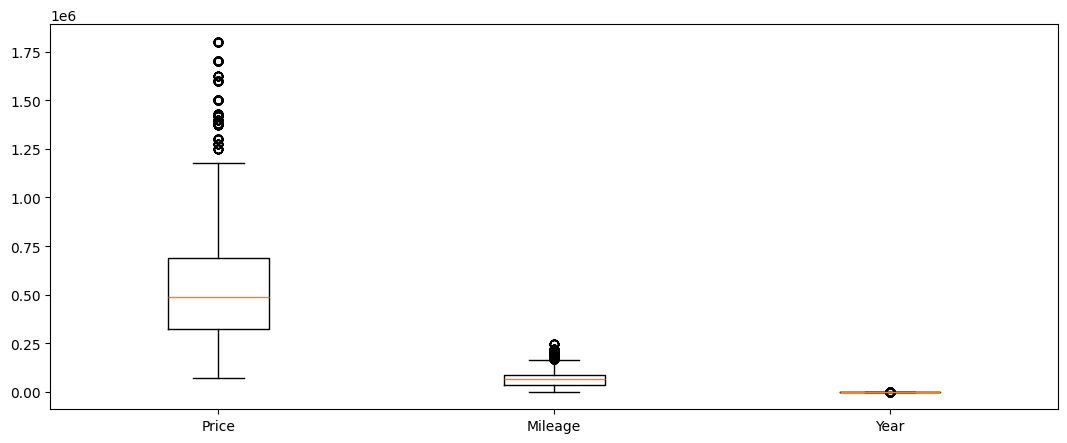

In [84]:
plt.figure(figsize=(13, 5))
ax = plt.subplot()
features_to_plot = ['Price', 'Mileage','Year']
plt.boxplot(df_cleaned[features_to_plot])
ax.set_xticklabels(features_to_plot)
plt.show()


In [85]:
df

,Car Name,Car Model,Year,Mileage,Fuel Type,Owner,Price
0,MARUTI SUZUKI ALTO,LX BS-III,2011.0,60000.0,Petrol,2nd Owner,175000.0
1,TATA MOTORS ZEST,XMS Diesel,2018.0,65226.0,Diesel,1st Owner,320000.0
2,TOYOTA FORTUNER,2.5 Sportivo 4x2 MT,2013.0,125438.0,Diesel,1st Owner,1380000.0
3,MAHINDRA TUV 300,T4 Plus,2020.0,65655.0,Diesel,1st Owner,600000.0
4,MARUTI SUZUKI ERTIGA,VXI,2022.0,14000.0,Diesel,1st Owner,1080000.0
...,...,...,...,...,...,...,...
10432,TATA MOTORS Nano,Twist XE,2015.0,45000.0,Petrol,1 Owner,180000.0
10433,MARUTI SUZUKI ALTO,AX,2010.0,34000.0,CNG,1 Owner,180000.0
10434,HYUNDAI Santro Xing [2003-2008],XK (Non-AC) eRLX - Euro III,2007.0,45000.0,Petrol,1 Owner,100000.0
10435,VOLKSWAGEN Vento [2014-2015],Comfortline Diesel,2015.0,33000.0,Diesel,1 Owner,1000000.0


In [86]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoders = {}  # Use a dictionary to store individual LabelEncoders
columns_to_encode = ['Car Name', 'Car Model', 'Owner', 'Fuel Type']

encoded_data = df.copy()

for col in columns_to_encode:
    label_encoder = LabelEncoder()
    encoded_data[col] = label_encoder.fit_transform(encoded_data[col])
    label_encoders[col] = label_encoder


In [88]:
encoded_data

,Car Name,Car Model,Year,Mileage,Fuel Type,Owner,Price
0,79,180,2011.0,60000.0,4,3,175000.0
1,133,297,2018.0,65226.0,1,1,320000.0
2,140,72,2013.0,125438.0,1,1,1380000.0
3,70,238,2020.0,65655.0,1,1,600000.0
4,88,258,2022.0,14000.0,1,1,1080000.0
...,...,...,...,...,...,...,...
10432,125,242,2015.0,45000.0,4,0,180000.0
10433,79,98,2010.0,34000.0,0,0,180000.0
10434,47,290,2007.0,45000.0,4,0,100000.0
10435,156,129,2015.0,33000.0,1,0,1000000.0


In [89]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the 'StandardScaler' class, which will be used to standardize or scale data.
scaler = StandardScaler()

In [90]:
X = encoded_data.drop('Price', axis=1)


In [91]:
y = encoded_data['Price']

In [92]:
print(X)
print(y)

       Car Name  Car Model    Year   Mileage  Fuel Type  Owner
0            79        180  2011.0   60000.0          4      3
1           133        297  2018.0   65226.0          1      1
2           140         72  2013.0  125438.0          1      1
3            70        238  2020.0   65655.0          1      1
4            88        258  2022.0   14000.0          1      1
...         ...        ...     ...       ...        ...    ...
10432       125        242  2015.0   45000.0          4      0
10433        79         98  2010.0   34000.0          0      0
10434        47        290  2007.0   45000.0          4      0
10435       156        129  2015.0   33000.0          1      0
10436        97        258  2021.0  140000.0          4      0

[9426 rows x 6 columns]
0         175000.0
1         320000.0
2        1380000.0
3         600000.0
4        1080000.0
           ...    
10432     180000.0
10433     180000.0
10434     100000.0
10435    1000000.0
10436     880000.0
Name: Pric

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
nan_indices = y_train.index[y_train.isna()]
print(f"Number of NaN values in y_train: {len(nan_indices)}")


Number of NaN values in y_train: 0


In [96]:
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')  # You can choose 'median' or 'constant' as well

# Fit and transform on the target variable
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()


In [106]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [107]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [108]:
x_pred = rf_model.predict(X_train)
r2_score(y_train,x_pred)

0.9992672884193887

In [109]:
y_pred = rf_model.predict(X_test)
r2_score(y_test,y_pred)

0.9981530335186186

In [110]:
import pickle

In [111]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(rf_model,open('rf_Model.pkl','wb'))

In [112]:
import pickle

# Save label_encoders as a dictionary
with open('label_encoders.pkl', 'wb') as le_file:
    pickle.dump(label_encoders, le_file)


In [113]:
X_test.columns

Index(['Car Name', 'Car Model', 'Year', 'Mileage', 'Fuel Type', 'Owner'], dtype='object')